In [208]:
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [209]:
df = pd.read_csv("../CSV/HSV_GLCM/HSV_GLCM_Training.csv")
df

,label,H,S,V,Contrast,Homogeneity,Energy
0,1,81.974577,102.584973,168.376517,265.138486,0.406924,0.058997
1,1,54.737978,91.916578,146.841428,172.898950,0.366571,0.050431
2,1,76.855214,96.200118,160.534384,277.776157,0.342998,0.048281
3,1,76.855214,96.200118,160.534384,277.776157,0.342998,0.048281
4,1,33.478151,103.161639,147.159878,181.864609,0.373101,0.063695
...,...,...,...,...,...,...,...
195,5,83.991077,82.608059,155.094844,316.990375,0.243291,0.048890
196,5,83.991077,82.608059,155.094844,316.990375,0.243291,0.048890
197,5,86.196517,71.111233,170.544318,188.521910,0.328620,0.049430
198,5,86.196517,71.111233,170.544318,188.521910,0.328620,0.049430


In [210]:
X = df.drop(columns="label", axis = 1)
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((160, 6), (40, 6), (160,), (40,))

In [211]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()

# scaler.fit(X_train)

# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [212]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

# scaler.fit(X_train)

# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [213]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(X_train, y_train)


GaussianNB()

In [214]:
predictions = model.predict(X_test)

print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00         4
           2       1.00      1.00      1.00         9
           3       0.54      0.88      0.67         8
           4       0.67      0.44      0.53         9
           5       0.67      0.80      0.73        10

    accuracy                           0.70        40
   macro avg       0.57      0.62      0.59        40
weighted avg       0.65      0.70      0.66        40



C:\Users\makba\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\makba\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\makba\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1327

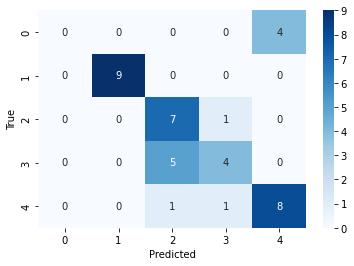

In [215]:
import seaborn as sns
import matplotlib.pyplot as plt

# menghitung confusion matrix
conf_mat = confusion_matrix(y_test, predictions)

sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [216]:
# import joblib

# # simpan model dalam file .pkl
# joblib.dump(model, 'NaiveBayes.pkl')

In [217]:
dt = pd.read_csv("../CSV/HSV_GLCM/HSV_GLCM_Testing.csv")
x_pred = dt.drop('label', axis=1)
y_true = dt['label']

x_pred

,H,S,V,Contrast,Homogeneity,Energy
0,75.729207,143.896614,171.584803,247.056059,0.354861,0.060163
1,82.076242,92.058603,188.019142,208.210183,0.426788,0.066775
2,81.025352,115.197752,175.925893,205.543086,0.381517,0.076139
3,83.869878,121.008110,158.315995,190.738674,0.255285,0.045246
4,96.222900,112.547039,179.969918,229.870708,0.197082,0.045632
5,89.591180,122.983177,182.470417,182.184971,0.263845,0.055688
6,96.042360,103.192065,178.292771,187.244587,0.256106,0.062133
7,85.100154,120.321136,188.340366,268.429291,0.304177,0.068222
8,84.156720,100.012220,166.383919,174.901921,0.344852,0.048248
9,92.305871,84.218896,148.585724,156.074376,0.295191,0.038809


In [218]:
y_pred  = model.predict(x_pred)
y_pred

array([1, 1, 5, 4, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 3, 3, 5, 5, 5],
      dtype=int64)

In [219]:
x_pred["label"] = model.predict(x_pred)
x_pred

,H,S,V,Contrast,Homogeneity,Energy,label
0,75.729207,143.896614,171.584803,247.056059,0.354861,0.060163,1
1,82.076242,92.058603,188.019142,208.210183,0.426788,0.066775,1
2,81.025352,115.197752,175.925893,205.543086,0.381517,0.076139,5
3,83.869878,121.008110,158.315995,190.738674,0.255285,0.045246,4
4,96.222900,112.547039,179.969918,229.870708,0.197082,0.045632,2
5,89.591180,122.983177,182.470417,182.184971,0.263845,0.055688,2
6,96.042360,103.192065,178.292771,187.244587,0.256106,0.062133,2
7,85.100154,120.321136,188.340366,268.429291,0.304177,0.068222,2
8,84.156720,100.012220,166.383919,174.901921,0.344852,0.048248,3
9,92.305871,84.218896,148.585724,156.074376,0.295191,0.038809,3


In [220]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7894736842105263
